In [176]:
import pandas as pd

In [177]:
df = pd.read_excel("../data/PM_ML_Data_Final.xlsx")

In [178]:
df

,TestID,WNRD,WNVol,WNNCD,Class
0,1,0.000120,0.012339,0.008525,Similar
1,2,0.000120,0.011953,0.008375,Similar
2,3,0.000196,0.007618,0.004438,Similar
3,4,0.000197,0.007452,0.004424,Similar
4,5,0.000162,0.012785,0.009120,Similar
...,...,...,...,...,...
961,962,0.091940,0.124211,0.153080,Different
962,963,0.082274,0.117211,0.140817,Different
963,964,0.091940,0.124431,0.153347,Different
964,965,0.082279,0.111474,0.135962,Different


In [179]:
df = pd.read_excel("../data/PM_ML_Data_Final.xlsx", index_col="TestID")

In [180]:
df

,WNRD,WNVol,WNNCD,Class
TestID,,,,
1,0.000120,0.012339,0.008525,Similar
2,0.000120,0.011953,0.008375,Similar
3,0.000196,0.007618,0.004438,Similar
4,0.000197,0.007452,0.004424,Similar
5,0.000162,0.012785,0.009120,Similar
...,...,...,...,...
962,0.091940,0.124211,0.153080,Different
963,0.082274,0.117211,0.140817,Different
964,0.091940,0.124431,0.153347,Different


In [181]:
from sklearn.model_selection import train_test_split

In [182]:
seed = 7

In [183]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [184]:
X

,WNRD,WNVol,WNNCD
TestID,,,
1,0.000120,0.012339,0.008525
2,0.000120,0.011953,0.008375
3,0.000196,0.007618,0.004438
4,0.000197,0.007452,0.004424
5,0.000162,0.012785,0.009120
...,...,...,...
962,0.091940,0.124211,0.153080
963,0.082274,0.117211,0.140817
964,0.091940,0.124431,0.153347


In [185]:
y

TestID
1        Similar
2        Similar
3        Similar
4        Similar
5        Similar
         ...    
962    Different
963    Different
964    Different
965    Different
966    Different
Name: Class, Length: 966, dtype: object

In [186]:
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [187]:
X_train

,WNRD,WNVol,WNNCD
TestID,,,
415,0.002227,0.105717,0.062179
319,0.198656,0.127894,0.233370
573,0.002356,0.169175,0.120250
506,0.008541,0.089513,0.060240
601,0.000945,0.168636,0.136925
...,...,...,...
580,0.002454,0.114904,0.083363
503,0.007232,0.093650,0.066664
538,0.000882,0.123532,0.086431


In [188]:
X_test

,WNRD,WNVol,WNNCD
TestID,,,
238,0.186641,0.127044,0.224919
564,0.006220,0.098347,0.082061
676,0.006239,0.134682,0.100609
25,0.000435,0.008095,0.005574
205,0.160748,0.140607,0.210533
...,...,...,...
796,0.000386,0.022569,0.016738
189,0.167908,0.161788,0.215418
252,0.185649,0.130624,0.223735


In [189]:
y_train

TestID
415           Lab
319     Different
573    Instrument
506    Instrument
601    Instrument
          ...    
580    Instrument
503    Instrument
538    Instrument
197     Different
176     Different
Name: Class, Length: 676, dtype: object

In [190]:
y_test

TestID
238     Different
564    Instrument
676    Instrument
25        Similar
205     Different
          ...    
796           Day
189     Different
252     Different
72        Similar
682    Instrument
Name: Class, Length: 290, dtype: object

# KMeans Clusters

In [191]:
from sklearn.cluster import KMeans

In [192]:
train_clusters = KMeans(n_clusters=5).fit(X)

In [193]:
train_clusters

KMeans(n_clusters=5)

In [194]:
train_clusters.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 5,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [195]:
train_clusters.cluster_centers_

array([[0.00463089, 0.09699271, 0.07357186],
       [0.18084456, 0.12720979, 0.21902689],
       [0.0003643 , 0.01834741, 0.01300256],
       [0.01531014, 0.14695857, 0.11453591],
       [0.20155575, 0.17670058, 0.26133727]])

In [196]:
feature_names = ["WNRD","WNVol","WNNCD"]

In [197]:
x_clusters = X[feature_names]
print(x_clusters.shape)
x_clusters.head()

(966, 3)


,WNRD,WNVol,WNNCD
TestID,,,
1,0.000120,0.012339,0.008525
2,0.000120,0.011953,0.008375
3,0.000196,0.007618,0.004438
4,0.000197,0.007452,0.004424
5,0.000162,0.012785,0.009120


In [198]:
x_clusters['cluster'] = train_clusters.labels_[:]

In [199]:
x_clusters

,WNRD,WNVol,WNNCD,cluster
TestID,,,,
1,0.000120,0.012339,0.008525,2
2,0.000120,0.011953,0.008375,2
3,0.000196,0.007618,0.004438,2
4,0.000197,0.007452,0.004424,2
5,0.000162,0.012785,0.009120,2
...,...,...,...,...
962,0.091940,0.124211,0.153080,3
963,0.082274,0.117211,0.140817,3
964,0.091940,0.124431,0.153347,3


# Evaluation

In [200]:
x_clusters["Class"] = y[:]

In [201]:
print(x_clusters.shape)
x_clusters

(966, 5)


,WNRD,WNVol,WNNCD,cluster,Class
TestID,,,,,
1,0.000120,0.012339,0.008525,2,Similar
2,0.000120,0.011953,0.008375,2,Similar
3,0.000196,0.007618,0.004438,2,Similar
4,0.000197,0.007452,0.004424,2,Similar
5,0.000162,0.012785,0.009120,2,Similar
...,...,...,...,...,...
962,0.091940,0.124211,0.153080,3,Different
963,0.082274,0.117211,0.140817,3,Different
964,0.091940,0.124431,0.153347,3,Different


In [202]:
ct = pd.crosstab(x_clusters["Class"], x_clusters["cluster"])

In [204]:
ks = range(1,10)
inertias = []

In [205]:
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)

# Plot the result

In [206]:
import matplotlib.pyplot as plt

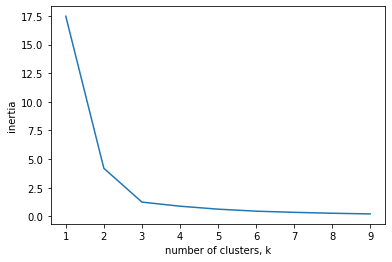

In [207]:
plt.plot(ks,inertias)
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# Predict for unknown data

In [208]:
x_clusters.to_csv("../data/PM_KMean_Clustering_Result.csv")

In [209]:
df2 = pd.read_csv("../data/PM_KMean_Clustering_Result.csv")

In [210]:
df2

,TestID,WNRD,WNVol,WNNCD,cluster,Class
0,1,0.000120,0.012339,0.008525,2,Similar
1,2,0.000120,0.011953,0.008375,2,Similar
2,3,0.000196,0.007618,0.004438,2,Similar
3,4,0.000197,0.007452,0.004424,2,Similar
4,5,0.000162,0.012785,0.009120,2,Similar
...,...,...,...,...,...,...
961,962,0.091940,0.124211,0.153080,3,Different
962,963,0.082274,0.117211,0.140817,3,Different
963,964,0.091940,0.124431,0.153347,3,Different
964,965,0.082279,0.111474,0.135962,3,Different


In [211]:
un = pd.read_excel("../data/PM_ML_Unknown.xlsx", index_col="TestID")

In [212]:
un

,WNRD,WNVol,WNNCD
TestID,,,
14,0.000206,0.019164,0.012985
70,0.000307,0.008519,0.009125
176,0.192594,0.087238,0.208814
295,0.199662,0.149283,0.246484
382,0.001103,0.047906,0.036669
419,0.002454,0.099070,0.057033
425,0.006560,0.139213,0.094563
723,0.006616,0.149104,0.099622
731,0.000245,0.024575,0.018870


In [213]:
cluster_distance_Unknown = train_clusters.fit_transform(un)

In [214]:
cluster_distance_un = pd.DataFrame(cluster_distance_Unknown, columns=['c0','c1','c2','c3','c4'])

In [215]:
cluster_distance_un

,c0,c1,c2,c3,c4
0,0.091270,0.333519,0.005115,0.150792,0.282836
1,0.102466,0.340436,0.015779,0.161790,0.288179
2,0.243579,0.072928,0.279090,0.224320,0.000000
3,0.278036,0.000000,0.329315,0.244175,0.072928
4,0.055084,0.306146,0.032357,0.113779,0.260480
5,0.000000,0.278036,0.086711,0.060455,0.243579
6,0.055107,0.245906,0.140515,0.005555,0.224417
7,0.065837,0.242560,0.151553,0.005555,0.224361
8,0.083731,0.327303,0.003016,0.143035,0.277495
9,0.101343,0.340307,0.014818,0.160810,0.288290


In [216]:
cluster_distance_un["Min"]=cluster_distance_un.min(axis=1)

In [217]:
cluster_distance_un

,c0,c1,c2,c3,c4,Min
0,0.091270,0.333519,0.005115,0.150792,0.282836,0.005115
1,0.102466,0.340436,0.015779,0.161790,0.288179,0.015779
2,0.243579,0.072928,0.279090,0.224320,0.000000,0.000000
3,0.278036,0.000000,0.329315,0.244175,0.072928,0.000000
4,0.055084,0.306146,0.032357,0.113779,0.260480,0.032357
5,0.000000,0.278036,0.086711,0.060455,0.243579,0.000000
6,0.055107,0.245906,0.140515,0.005555,0.224417,0.005555
7,0.065837,0.242560,0.151553,0.005555,0.224361,0.005555
8,0.083731,0.327303,0.003016,0.143035,0.277495,0.003016
9,0.101343,0.340307,0.014818,0.160810,0.288290,0.014818


# Lab with Iris

In [326]:
iris=pd.read_csv("../data/iris.csv")
iris

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,I. setosa
1,4.9,3.0,1.4,0.2,I. setosa
2,4.7,3.2,1.3,0.2,I. setosa
3,4.6,3.1,1.5,0.2,I. setosa
4,5.0,3.6,1.4,0.3,I. setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,I. virginica
146,6.3,2.5,5.0,1.9,I. virginica
147,6.5,3.0,5.2,2.0,I. virginica
148,6.2,3.4,5.4,2.3,I. virginica


In [327]:
X = iris.drop("Species", axis=1)
y = iris["Species"]

In [328]:
X

,Sepal_length,Sepal_width,Petal_length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.3
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [329]:
y.value_counts()

I. setosa        50
I. virginica     50
I. versicolor    50
Name: Species, dtype: int64

## Prepare data sets

In [330]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
X_train

,Sepal_length,Sepal_width,Petal_length,Petal_width
49,5.0,3.3,1.4,0.2
65,6.7,3.1,4.4,1.4
62,6.0,2.2,4.0,1.0
111,6.4,2.7,5.3,1.9
29,4.7,3.2,1.6,0.2
...,...,...,...,...
142,5.8,2.7,5.1,1.9
92,5.8,2.6,4.0,1.2
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0


### Index reset because the output of model.fit(), fit_transform() is not on the index but on the order

In [331]:
X_train = X_train.reset_index()
y_train = y_train.reset_index()
X_test = X_test.reset_index()
y_test = y_test.reset_index()
X_train

,index,Sepal_length,Sepal_width,Petal_length,Petal_width
0,49,5.0,3.3,1.4,0.2
1,65,6.7,3.1,4.4,1.4
2,62,6.0,2.2,4.0,1.0
3,111,6.4,2.7,5.3,1.9
4,29,4.7,3.2,1.6,0.2
...,...,...,...,...,...
100,142,5.8,2.7,5.1,1.9
101,92,5.8,2.6,4.0,1.2
102,103,6.3,2.9,5.6,1.8
103,67,5.8,2.7,4.1,1.0


## Define a model and fit the train data to the model

In [351]:
model = KMeans(n_clusters=3).fit(X)

## Check the model.labels_

In [352]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [353]:
# pd.condat tries to match index of X_train and df(model.labels_) where their index are unrelated
X_trained = pd.concat([X, pd.DataFrame(model.labels_, columns=["Cluster"]), y], axis=1)
X_trained

,Sepal_length,Sepal_width,Petal_length,Petal_width,Cluster,Species
0,5.1,3.5,1.4,0.2,0,I. setosa
1,4.9,3.0,1.4,0.2,0,I. setosa
2,4.7,3.2,1.3,0.2,0,I. setosa
3,4.6,3.1,1.5,0.2,0,I. setosa
4,5.0,3.6,1.4,0.3,0,I. setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,I. virginica
146,6.3,2.5,5.0,1.9,1,I. virginica
147,6.5,3.0,5.2,2.0,2,I. virginica
148,6.2,3.4,5.4,2.3,2,I. virginica


## Compare model.labels_ with real labels(y)

In [354]:
ct = pd.crosstab(X_trained["Species"], X_trained["Cluster"])
ct

Cluster,0,1,2
Species,,,
I. setosa,50,0,0
I. versicolor,0,48,2
I. virginica,0,14,36


### Therefore, we can match 
 * cluster 0 -> setosa
 * cluster 1 -> versicolor
 * cluster 2 -> virginica

## Evaluate the model with a test data set

In [336]:
X_test.shape

(45, 5)

### After fit_transform(), the index info is lost, so we need to reset index making the new index start from 0

In [337]:
cluster_distance = model.fit_transform(X_test)
X_test_cluster_distance = pd.DataFrame(cluster_distance, columns=["I. versicolor", "I. setosa", "I. virginica"])
X_test_cluster_distance

,I. versicolor,I. setosa,I. virginica
0,66.191314,115.984227,22.875455
1,1.344462,51.009532,42.158033
2,42.963939,6.958309,86.260059
3,16.818147,33.055206,60.147517
4,23.218986,72.993617,20.218336
5,41.982304,8.063466,85.272112
6,30.828458,19.272988,74.137906
7,11.202012,60.984525,32.173899
8,71.894168,22.078679,115.221612
9,31.816349,18.189897,75.140409


In [338]:
X_test_predict = X_test_cluster_distance.apply(lambda x: X_test_cluster_distance.columns[x.argmin()], axis=1)
X_test_cluster_distance["Predict"] = X_test_predict
X_test_cluster_distance

,I. versicolor,I. setosa,I. virginica,Predict
0,66.191314,115.984227,22.875455,I. virginica
1,1.344462,51.009532,42.158033,I. versicolor
2,42.963939,6.958309,86.260059,I. setosa
3,16.818147,33.055206,60.147517,I. versicolor
4,23.218986,72.993617,20.218336,I. virginica
5,41.982304,8.063466,85.272112,I. setosa
6,30.828458,19.272988,74.137906,I. setosa
7,11.202012,60.984525,32.173899,I. versicolor
8,71.894168,22.078679,115.221612,I. setosa
9,31.816349,18.189897,75.140409,I. setosa


In [339]:
test_result = pd.concat([X_test, X_test_cluster_distance, y_test["Species"]], axis=1)
test_result

,index,Sepal_length,Sepal_width,Petal_length,Petal_width,I. versicolor,I. setosa,I. virginica,Predict,Species
0,149,5.9,3.0,5.1,1.8,66.191314,115.984227,22.875455,I. virginica,I. virginica
1,84,5.4,3.0,4.5,1.5,1.344462,51.009532,42.158033,I. versicolor,I. versicolor
2,40,5.0,3.5,1.3,0.3,42.963939,6.958309,86.260059,I. setosa,I. setosa
3,66,5.6,3.0,4.5,1.5,16.818147,33.055206,60.147517,I. versicolor,I. versicolor
4,106,4.9,2.5,4.5,1.7,23.218986,72.993617,20.218336,I. virginica,I. virginica
5,41,4.5,2.3,1.3,0.3,41.982304,8.063466,85.272112,I. setosa,I. setosa
6,52,6.9,3.1,4.9,1.5,30.828458,19.272988,74.137906,I. setosa,I. versicolor
7,94,5.6,2.7,4.2,1.3,11.202012,60.984525,32.173899,I. versicolor,I. versicolor
8,11,4.8,3.4,1.6,0.2,71.894168,22.078679,115.221612,I. setosa,I. setosa
9,51,6.4,3.2,4.5,1.5,31.816349,18.189897,75.140409,I. setosa,I. versicolor


In [340]:
test_result["Score"] = 0
test_result["Score"] = test_result["Score"].where(test_result["Predict"] != test_result["Species"], 1)
test_result

,index,Sepal_length,Sepal_width,Petal_length,Petal_width,I. versicolor,I. setosa,I. virginica,Predict,Species,Score
0,149,5.9,3.0,5.1,1.8,66.191314,115.984227,22.875455,I. virginica,I. virginica,1
1,84,5.4,3.0,4.5,1.5,1.344462,51.009532,42.158033,I. versicolor,I. versicolor,1
2,40,5.0,3.5,1.3,0.3,42.963939,6.958309,86.260059,I. setosa,I. setosa,1
3,66,5.6,3.0,4.5,1.5,16.818147,33.055206,60.147517,I. versicolor,I. versicolor,1
4,106,4.9,2.5,4.5,1.7,23.218986,72.993617,20.218336,I. virginica,I. virginica,1
5,41,4.5,2.3,1.3,0.3,41.982304,8.063466,85.272112,I. setosa,I. setosa,1
6,52,6.9,3.1,4.9,1.5,30.828458,19.272988,74.137906,I. setosa,I. versicolor,0
7,94,5.6,2.7,4.2,1.3,11.202012,60.984525,32.173899,I. versicolor,I. versicolor,1
8,11,4.8,3.4,1.6,0.2,71.894168,22.078679,115.221612,I. setosa,I. setosa,1
9,51,6.4,3.2,4.5,1.5,31.816349,18.189897,75.140409,I. setosa,I. versicolor,0


In [341]:
test_result["Score"].sum() / len(test_result)

0.9111111111111111

## Predict the label of the unknown data set using the model

In [342]:
un = pd.read_csv("../data/iris_unknown.csv")
un

,Sepal_length,Sepal_width,Petal_length,Petal_width
0,4.6,3.2,1.4,0.2
1,5.3,3.7,1.5,0.2
2,5.0,3.3,1.4,0.2
3,7.0,3.2,4.7,1.4
4,6.4,3.2,4.5,1.5
5,6.9,3.1,4.9,1.5
6,6.3,3.3,6.0,2.5
7,5.8,2.7,5.1,1.9
8,7.1,3.0,5.9,2.1


## Put each datum into a closest cluster

In [343]:
cluster_distance = model.fit_transform(un)
result = pd.DataFrame(cluster_distance, columns=["versicolor", "setosa", "virginica"])
result

,versicolor,setosa,virginica
0,0.418994,4.144726,5.433691
1,0.453382,3.834547,5.145386
2,0.110554,3.979793,5.293864
3,4.035537,0.537355,1.570032
4,3.631651,0.365718,1.683746
5,4.187548,0.398434,1.336039
6,5.285094,1.552015,0.474342
7,4.185557,0.918559,1.376590
8,5.317163,1.348610,0.474342


In [344]:
result["Predicted Species"] = result.apply(lambda x: result.columns[x.argmin()], axis=1)
result

,versicolor,setosa,virginica,Predicted Species
0,0.418994,4.144726,5.433691,versicolor
1,0.453382,3.834547,5.145386,versicolor
2,0.110554,3.979793,5.293864,versicolor
3,4.035537,0.537355,1.570032,setosa
4,3.631651,0.365718,1.683746,setosa
5,4.187548,0.398434,1.336039,setosa
6,5.285094,1.552015,0.474342,virginica
7,4.185557,0.918559,1.376590,setosa
8,5.317163,1.348610,0.474342,virginica
